# Submisi NLP Belajar Pengembangan Machine Learning
## Nama : Husni Naufal Zuhdi

## Scoring Criterias

Minimum Criteria
1. Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel. (v)
2. Harus menggunakan LSTM dalam arsitektur model. (v)
3. Harus menggunakan model sequential. (v)
4. Validation set sebesar 20% dari total dataset. (v)
5. Harus menggunakan Embedding. (v)
6. Harus menggunakan fungsi tokenizer. (v)
7. Akurasi dari model minimal 75%. (v)

High Score Criteria
1. Akurasi dari model di atas 80%. (x)
2. Mengimplementasikan callback. (v)
3. Membuat plot loss dan akurasi pada saat training dan validation. (v)

4 Star Criteria
1. Semua ketentuan terpenuhi (?)
2. Dataset memiliki minimal 2000 sampel data (v)
3. Akurasi pada training set dan validation set di atas 85%. (x)

5 Star Criteria
1. Semua ketentuan terpenuhi (?)
2. Dataset memiliki 3 kelas atau lebih (v)
3. Minimal 2000 sampel data (v)
4. Serta akurasi pada training set dan validation set di atas 90%. (x)

## Pre Processing

In [1]:
# The process to acces Kaggle API refer to this article
# https://www.kaggle.com/general/74235
# Install kaggle API
! pip install -q kaggle

In [2]:
# Insert my kaggle json key
from google.colab import files
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# # Download Google QUEST Q&A Labeling Competition Dataset
# # https://www.kaggle.com/c/google-quest-challenge/data
! kaggle competitions download -c google-quest-challenge

test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Unzip the dataset
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [5]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from keras.regularizers import l2

In [6]:
# Read train csv file
df = pd.read_csv('/content/train.csv')
df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,0.000000,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.333333,0.333333,0.0,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [7]:
# Gain insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   qa_id                                  6079 non-null   int64  
 1   question_title                         6079 non-null   object 
 2   question_body                          6079 non-null   object 
 3   question_user_name                     6079 non-null   object 
 4   question_user_page                     6079 non-null   object 
 5   answer                                 6079 non-null   object 
 6   answer_user_name                       6079 non-null   object 
 7   answer_user_page                       6079 non-null   object 
 8   url                                    6079 non-null   object 
 9   category                               6079 non-null   object 
 10  host                                   6079 non-null   object 
 11  ques

In [8]:
# Check Null Value
df.isnull().sum()

qa_id                                    0
question_title                           0
question_body                            0
question_user_name                       0
question_user_page                       0
answer                                   0
answer_user_name                         0
answer_user_page                         0
url                                      0
category                                 0
host                                     0
question_asker_intent_understanding      0
question_body_critical                   0
question_conversational                  0
question_expect_short_answer             0
question_fact_seeking                    0
question_has_commonly_accepted_answer    0
question_interestingness_others          0
question_interestingness_self            0
question_multi_intent                    0
question_not_really_a_question           0
question_opinion_seeking                 0
question_type_choice                     0
question_ty

In [9]:
# Read csv file
df_2 = pd.read_csv('/content/test.csv')
df_2.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


In [10]:
# Gain insights
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   qa_id               476 non-null    int64 
 1   question_title      476 non-null    object
 2   question_body       476 non-null    object
 3   question_user_name  476 non-null    object
 4   question_user_page  476 non-null    object
 5   answer              476 non-null    object
 6   answer_user_name    476 non-null    object
 7   answer_user_page    476 non-null    object
 8   url                 476 non-null    object
 9   category            476 non-null    object
 10  host                476 non-null    object
dtypes: int64(1), object(10)
memory usage: 41.0+ KB


In [11]:
# Check Null Value
df_2.isnull().sum()

qa_id                 0
question_title        0
question_body         0
question_user_name    0
question_user_page    0
answer                0
answer_user_name      0
answer_user_page      0
url                   0
category              0
host                  0
dtype: int64

In [12]:
# Pre processing train.csv
category_1 = pd.get_dummies(df.category)
new_df_1 = pd.concat([df.question_title, category_1], axis=1)
new_df_1

,question_title,CULTURE,LIFE_ARTS,SCIENCE,STACKOVERFLOW,TECHNOLOGY
0,What am I losing when using extension tubes in...,0,1,0,0,0
1,What is the distinction between a city and a s...,1,0,0,0,0
2,Maximum protusion length for through-hole comp...,0,0,1,0,0
3,Can an affidavit be used in Beit Din?,1,0,0,0,0
4,How do you make a binary image in Photoshop?,0,1,0,0,0
...,...,...,...,...,...,...
6074,Using a ski helmet for winter biking,1,0,0,0,0
6075,Adjustment to road bike brakes for high grade ...,1,0,0,0,0
6076,Suppress 'file truncated' messages when using ...,0,0,0,0,1
6077,When should a supervisor be a co-author?,0,0,1,0,0


In [13]:
# Pre processing test.csv
category_2 = pd.get_dummies(df_2.category)
new_df_2 = pd.concat([df_2.question_title, category_2], axis=1)
new_df_2

,question_title,CULTURE,LIFE_ARTS,SCIENCE,STACKOVERFLOW,TECHNOLOGY
0,Will leaving corpses lying around upset my pri...,1,0,0,0,0
1,Url link to feature image in the portfolio,0,0,0,0,1
2,"Is accuracy, recoil or bullet spread affected ...",1,0,0,0,0
3,Suddenly got an I/O error from my external HDD,0,0,0,0,1
4,Passenger Name - Flight Booking Passenger only...,1,0,0,0,0
...,...,...,...,...,...,...
471,change gb4e enumeration in only one chapter,0,0,0,0,1
472,All anagrams in a File,0,0,0,1,0
473,SQL Server: Time Series Table Design,0,0,0,0,1
474,Is a countered flashback spell exiled?,1,0,0,0,0


In [14]:
# Append test.csv into train,csv
latest_df = new_df_1.append(new_df_2, ignore_index=True)
latest_df

,question_title,CULTURE,LIFE_ARTS,SCIENCE,STACKOVERFLOW,TECHNOLOGY
0,What am I losing when using extension tubes in...,0,1,0,0,0
1,What is the distinction between a city and a s...,1,0,0,0,0
2,Maximum protusion length for through-hole comp...,0,0,1,0,0
3,Can an affidavit be used in Beit Din?,1,0,0,0,0
4,How do you make a binary image in Photoshop?,0,1,0,0,0
...,...,...,...,...,...,...
6550,change gb4e enumeration in only one chapter,0,0,0,0,1
6551,All anagrams in a File,0,0,0,1,0
6552,SQL Server: Time Series Table Design,0,0,0,0,1
6553,Is a countered flashback spell exiled?,1,0,0,0,0


In [15]:
# Gain insight from latest_df
latest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_title  6555 non-null   object
 1   CULTURE         6555 non-null   uint8 
 2   LIFE_ARTS       6555 non-null   uint8 
 3   SCIENCE         6555 non-null   uint8 
 4   STACKOVERFLOW   6555 non-null   uint8 
 5   TECHNOLOGY      6555 non-null   uint8 
dtypes: object(1), uint8(5)
memory usage: 83.3+ KB


In [16]:
# Check imbalance data
culture = latest_df['CULTURE'].value_counts()
life_art = latest_df['LIFE_ARTS'].value_counts()
science = latest_df['SCIENCE'].value_counts()
stack = latest_df['STACKOVERFLOW'].value_counts()
tech = latest_df['TECHNOLOGY'].value_counts()
print(culture, life_art, science, stack, tech)

0    5528
1    1027
Name: CULTURE, dtype: int64 0    5799
1     756
Name: LIFE_ARTS, dtype: int64 0    5784
1     771
Name: SCIENCE, dtype: int64 0    5199
1    1356
Name: STACKOVERFLOW, dtype: int64 0    3910
1    2645
Name: TECHNOLOGY, dtype: int64


In [17]:
# Gain insight from latest_df
latest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_title  6555 non-null   object
 1   CULTURE         6555 non-null   uint8 
 2   LIFE_ARTS       6555 non-null   uint8 
 3   SCIENCE         6555 non-null   uint8 
 4   STACKOVERFLOW   6555 non-null   uint8 
 5   TECHNOLOGY      6555 non-null   uint8 
dtypes: object(1), uint8(5)
memory usage: 83.3+ KB


In [18]:
# Make Clean Function to lowering strings and add space between punctuations
# Inspired by this article
# https://www.kaggle.com/hamishdickson/using-keras-oov-tokens
def clean_str(string):
    string = str(string)
    string = string.lower()
    
    # punctuations = '!"#$%&()*+,-./:;<=>@[\]^_`{|}~ '

    specials = [',', '?', '!', '$']
    for s in specials:
        string = string.replace(s, f' {s} ')
        
    return string

In [19]:
# Test our clean function
test_string = "How do you make a binary image in Photoshop?"
test_string = clean_str(test_string)
print(test_string)

how do you make a binary image in photoshop ? 


In [20]:
# Convert Dataframe into numpy array
headline = latest_df['question_title'].apply(clean_str)
headline = headline.values
label = latest_df[[
                'CULTURE',
                'LIFE_ARTS',
                'SCIENCE',
                'STACKOVERFLOW',
                'TECHNOLOGY',
]].values

In [21]:
# Split data into train and test data
train_headline, test_headline, train_label, test_label = train_test_split(headline, label, test_size=0.2)

In [22]:
# Tokenizer and tranform headline into sequences
tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(train_headline) 
tokenizer.fit_on_texts(test_headline)
 
train_sequences = tokenizer.texts_to_sequences(train_headline)
test_sequences = tokenizer.texts_to_sequences(test_headline)
 
train_padded = pad_sequences(train_sequences) 
test_padded = pad_sequences(test_sequences)

In [23]:
our_sent = tokenizer.texts_to_sequences([test_string])
seq_sent = tokenizer.sequences_to_texts(our_sent)
print(our_sent, seq_sent)

[[6, 15, 33, 47, 3, 665, 73, 5, 453]] ['how do you make a binary image in photoshop']


## Build Machine Learning Model

In [24]:
# Build our Machine Learning Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(512,
                          activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),
                          bias_regularizer=regularizers.l2(1e-04)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(256,
                          activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),
                          bias_regularizer=regularizers.l2(1e-04)),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
# See model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          16000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 202,629
Trainable params: 202,629
Non-trainable params: 0
__________________________________________________

In [26]:
# Build Callback Class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      if(logs.get('val_accuracy')>0.9):
        print("\nModel accuracy and Validation accuracy reach >90%!")
        self.model.stop_training = True
callbacks = myCallback()

## Train and Test Model

In [27]:
# Test our Machine Learning Model
num_epochs = 500
history = model.fit(train_padded,
                    train_label,
                    epochs=num_epochs, 
                    validation_data=(test_padded, test_label),
                    callbacks=[callbacks],
                    verbose=2)

Epoch 1/500
164/164 - 6s - loss: 2.2613 - accuracy: 0.4088 - val_loss: 1.4574 - val_accuracy: 0.3783
Epoch 2/500
164/164 - 3s - loss: 1.3056 - accuracy: 0.4432 - val_loss: 1.2825 - val_accuracy: 0.4264
Epoch 3/500
164/164 - 3s - loss: 1.1636 - accuracy: 0.4903 - val_loss: 1.2219 - val_accuracy: 0.4516
Epoch 4/500
164/164 - 3s - loss: 1.1147 - accuracy: 0.4987 - val_loss: 1.2330 - val_accuracy: 0.4561
Epoch 5/500
164/164 - 3s - loss: 1.0814 - accuracy: 0.5078 - val_loss: 1.2277 - val_accuracy: 0.4531
Epoch 6/500
164/164 - 3s - loss: 1.0639 - accuracy: 0.5109 - val_loss: 1.2130 - val_accuracy: 0.4638
Epoch 7/500
164/164 - 3s - loss: 1.0396 - accuracy: 0.5168 - val_loss: 1.1883 - val_accuracy: 0.4630
Epoch 8/500
164/164 - 3s - loss: 1.0170 - accuracy: 0.5296 - val_loss: 1.2242 - val_accuracy: 0.4905
Epoch 9/500
164/164 - 3s - loss: 1.0057 - accuracy: 0.5324 - val_loss: 1.2291 - val_accuracy: 0.5179
Epoch 10/500
164/164 - 3s - loss: 0.9957 - accuracy: 0.5481 - val_loss: 1.2177 - val_accura

## Evaluate

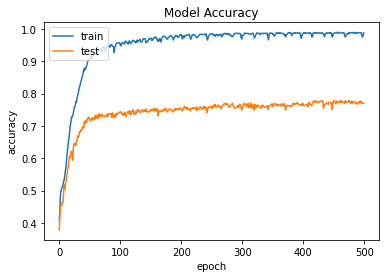

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

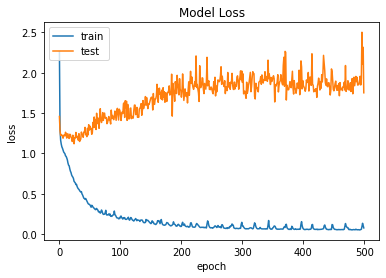

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()